# RECOLECTAR LA SERIE DE DATOS TEMPORALES DE LOS PRECIOS HISTORICOS DE BITCOIN

Importamos las librerías

In [1]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
from datetime import date

import seaborn as sns
import matplotlib.pyplot as plt

Recolectamos todos los datos del histórico de precios de Bitcoin en dólares estadounidenses a través de la API yfinance con un intervalo diario. 


In [2]:
btc = yf.Ticker('BTC-USD')

In [3]:
data = btc.history(period='max', interval= '1d')

In [4]:
data = data.drop(['Dividends', 'Stock Splits'], axis=1)

Configuramos la fecha como índice y cambiamos su formato a timestamp. 

In [5]:
data = data.reset_index()

In [6]:
data['Date'] = data.Date.apply(lambda x: x.date())

In [7]:
data = data.set_index('Date')

Comprobamos si hay valores nulos.

In [8]:
data.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Ver qué tipo de datos tenemos. 

In [9]:
data.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

Mostramos los datos en formato tabla y gráficamente.

In [10]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2023-10-23,30140.685547,34370.437500,30097.828125,33086.234375,38363572311
2023-10-24,33077.304688,35150.433594,32880.761719,33901.527344,44934999645
2023-10-25,33916.042969,35133.757812,33709.109375,34502.820312,25254318008


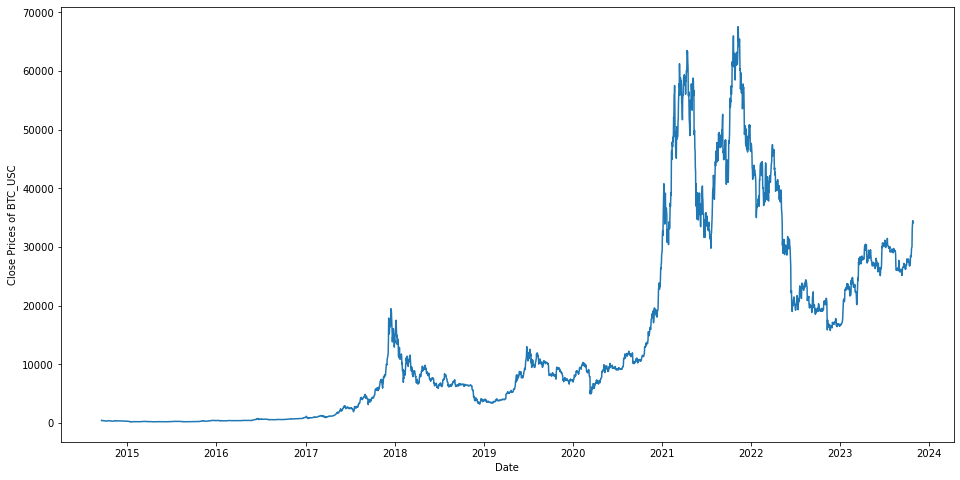

In [11]:
fig = plt.subplots(figsize=(16,8)) 
data['Close'].plot()
plt.ylabel("Close Prices of BTC_USC")
plt.show()

Guardamos los datos en un archivo CSV llamado 'Prices_BTC'.

In [12]:
#Save this row data for further uses

data.to_csv('Prices_BTC.csv', encoding='utf-8')

---------------------------------------------------------------------------

### Calculamos los indicadores técnicos usando los datos historicos 

In [13]:
macd = data.ta.macd(close= data.Close, window_slow= 26, window_fast= 12, window_sign= 9, fillna = False)

In [14]:
cci = data.ta.cci(high= data.High, low=data.Low, close=data.Close, window=20, constant=0.015, fillna=False)

In [15]:
adx = data.ta.adx(high= data.High, low=data.Low, close=data.Close, window=14, fillna=False)

In [16]:
rsi = ta.momentum.rsi(close= data['Close'], window = 14, fillna = False)

In [17]:
atr = data.ta.atr(high= data.High, low=data.Low, close=data.Close, window = 14, fillna= False)

In [18]:
obv = data.ta.obv(close=data.Close, volume=data.Volume, fillna = False)

In [19]:
cmf = data.ta.cmf(high= data.High, low=data.Low, close=data.Close, volume=data.Volume, window = 20, fillna = False)

In [20]:
data = data.assign(
    SMA_14 = data['Close'].rolling(14).mean(),
    EMA_26 = data['Close'].ewm(span=26, adjust=False).mean(),
    EMA_12 = data['Close'].ewm(span=12, adjust=False).mean(),
    MACD = macd.MACD_12_26_9, 
    MACDh = macd.MACDh_12_26_9, 
    MACDs = macd.MACDs_12_26_9,
    CCI = data.index.map(cci),
    ADX = data.index.map(adx.ADX_14),
    RSI = data.index.map(rsi),
    ATR = data.index.map(atr),
    OBV = data.index.map(obv),
    CMF = data.index.map(cmf),
                  )


Comporbamos si hay valors nulos. 

Se puede observar que obtenemos dos columnas con valores nulos, pero, como en muchos de los indicadores se utilizan medias móviles para su cálculo, sabemos de antemano que tendría que haber más de dos, por lo que, imprimimos el dataset para comprobarlo.

In [21]:
data.isnull().sum()

Open       0
High       0
Low        0
Close      0
Volume     0
SMA_14    13
EMA_26     0
EMA_12     0
MACD       0
MACDh      0
MACDs     25
CCI        0
ADX        0
RSI        0
ATR        0
OBV        0
CMF        0
dtype: int64

In [22]:
data

,Open,High,Low,Close,Volume,SMA_14,EMA_26,EMA_12,MACD,MACDh,MACDs,CCI,ADX,RSI,ATR,OBV,CMF
Date,,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,NaN,457.334015,457.334015,False,False,NaN,False,False,False,False,2.105680e+07,False
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,NaN,454.897421,452.273398,False,False,NaN,False,False,False,False,-1.342640e+07,False
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,NaN,450.445463,443.430719,False,False,NaN,False,False,False,False,-5.134610e+07,False
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,NaN,447.368317,438.118915,False,False,NaN,False,False,False,False,-1.448250e+07,False
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,NaN,443.772221,432.073084,False,False,NaN,False,False,False,False,-4.106260e+07,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-23,30140.685547,34370.437500,30097.828125,33086.234375,38363572311,28469.266323,28343.248536,29318.876315,975.627779,453.271346,522.356433,226.551656,38.759508,85.254951,975.610474,1.121024e+12,0.112792
2023-10-24,33077.304688,35150.433594,32880.761719,33901.527344,44934999645,28934.302595,28754.972892,30023.899550,1268.926658,597.25618,671.670478,207.77371,41.969836,86.836775,1068.043431,1.165959e+12,0.053218
2023-10-25,33916.042969,35133.757812,33709.109375,34502.820312,25254318008,29479.266881,29180.739368,30712.964283,1532.224915,688.44355,843.781365,170.035664,44.950855,87.870296,1093.515217,1.191213e+12,0.09263


In [23]:
data.describe()

,Open,High,Low,Close,Volume,SMA_14,EMA_26,EMA_12,OBV
count,3328.000000,3328.000000,3328.000000,3328.000000,3.328000e+03,3315.000000,3328.000000,3328.000000,3.328000e+03
mean,14091.595902,14425.904968,13729.309550,14100.353554,1.646787e+10,14091.830097,13989.804190,14048.737430,6.747123e+11
std,15964.193988,16355.434224,15521.733129,15963.109296,1.923626e+10,15917.420012,15819.170136,15897.379661,7.407208e+11
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06,222.873070,230.699121,224.309373,-3.328073e+08
25%,829.494995,865.607742,818.420990,833.594254,1.417312e+08,873.916674,820.551142,860.904320,5.248533e+09
50%,8077.089355,8252.782715,7870.534912,8079.032959,1.078250e+10,8130.654890,7999.800339,8072.940707,2.636490e+11
75%,22648.807617,23141.982910,22202.544922,22686.159180,2.706145e+10,22687.417271,22301.906145,22488.918520,1.203107e+12
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,63983.060826,62406.255181,64182.504548,2.687110e+12


Como ya habiamos predecido, hay un total de 8 columnas en las que hay valores faltantes para las primeras observaciones debido a, como ya se ha comentado, el uso de medias móviles. Por ello, vamos a porceder a eliminar las primeras filas de datos hasta el final del año 2014.

In [24]:
df = data.reset_index().copy()

In [25]:
df = df.loc[(df['Date'] > date(2014, 12, 31))]

In [26]:
df = df.set_index('Date')

In [27]:
df

,Open,High,Low,Close,Volume,SMA_14,EMA_26,EMA_12,MACD,MACDh,MACDs,CCI,ADX,RSI,ATR,OBV,CMF
Date,,,,,,,,,,,,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,8036550,321.108355,331.283191,320.549943,-10.735773,0.341713,-11.077486,-57.027859,23.910594,40.192392,11.291673,-1.577285e+08,-0.123795
2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650,320.907571,330.079400,319.701031,-10.380708,0.557423,-10.938131,-75.406689,23.45774,40.706619,10.647321,-1.498678e+08,-0.095079
2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400,317.416571,326.449963,313.759642,-12.692487,-1.403485,-11.289002,-262.960652,25.146222,29.045723,12.320786,-1.829222e+08,-0.195739
2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100,313.370287,321.838485,306.134313,-15.706176,-3.53374,-12.172437,-298.862002,27.538004,25.181629,13.556685,-2.385513e+08,-0.215331
2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800,309.269431,318.330005,301.263496,-17.068365,-3.916743,-13.151622,-182.517643,29.758677,31.18292,13.598791,-1.945885e+08,-0.094704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-23,30140.685547,34370.437500,30097.828125,33086.234375,38363572311,28469.266323,28343.248536,29318.876315,975.627779,453.271346,522.356433,226.551656,38.759508,85.254951,975.610474,1.121024e+12,0.112792
2023-10-24,33077.304688,35150.433594,32880.761719,33901.527344,44934999645,28934.302595,28754.972892,30023.899550,1268.926658,597.25618,671.670478,207.77371,41.969836,86.836775,1068.043431,1.165959e+12,0.053218
2023-10-25,33916.042969,35133.757812,33709.109375,34502.820312,25254318008,29479.266881,29180.739368,30712.964283,1532.224915,688.44355,843.781365,170.035664,44.950855,87.870296,1093.515217,1.191213e+12,0.09263


In [28]:
df.describe()

,Open,High,Low,Close,Volume,SMA_14,EMA_26,EMA_12,OBV
count,3222.000000,3222.000000,3222.000000,3222.000000,3.222000e+03,3222.000000,3222.000000,3222.000000,3.222000e+03
mean,14543.182803,14888.220237,14169.278829,14552.273482,1.700886e+10,14488.096640,14437.603437,14498.727712,6.969118e+11
std,16026.161788,16419.220412,15581.187569,16024.750964,1.931372e+10,15971.244311,15880.296560,15958.828575,7.424594e+11
min,176.897003,211.731003,171.509995,178.102997,7.860650e+06,222.873070,230.699121,224.309373,-3.328073e+08
25%,1146.727509,1180.615021,1117.849976,1151.182495,2.882212e+08,1111.328908,1104.142784,1120.004208,8.563030e+09
50%,8340.845215,8573.780273,8174.020508,8340.812988,1.215287e+10,8337.180751,8403.970504,8434.079529,3.907944e+11
75%,23194.975586,23670.686523,22796.384277,23209.085449,2.766725e+10,23053.898403,22781.666552,22929.328598,1.223901e+12
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,63983.060826,62406.255181,64182.504548,2.687110e+12


Comprobamos los tipos de datos.

In [29]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
SMA_14    float64
EMA_26    float64
EMA_12    float64
MACD       object
MACDh      object
MACDs      object
CCI        object
ADX        object
RSI        object
ATR        object
OBV       float64
CMF        object
dtype: object

Cambiamos los datos de tipo objeto a datos de tipo decimal o float

In [30]:
#df.index= pd.to_datetime(df.index)

In [31]:
columns = df.select_dtypes(include='object').columns
df[columns] = df[columns].astype("float")

In [32]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
SMA_14    float64
EMA_26    float64
EMA_12    float64
MACD      float64
MACDh     float64
MACDs     float64
CCI       float64
ADX       float64
RSI       float64
ATR       float64
OBV       float64
CMF       float64
dtype: object

Comprobamos si hay algún valor faltante para el horizonte temporal.

In [33]:
pd.date_range(start = '2015-01-01', end = '2023-10-16' ).difference(df.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

-------------------------------

### Estudio de la correlación de valariables con la varriable target (precio de cierre).

In [34]:
df.corr()

,Open,High,Low,Close,Volume,SMA_14,EMA_26,EMA_12,MACD,MACDh,MACDs,CCI,ADX,RSI,ATR,OBV,CMF
Open,1.000000,0.999477,0.999079,0.998773,0.681674,0.995790,0.993131,0.997693,0.157208,-0.019809,0.171380,-0.054051,-0.043917,-0.058977,0.897999,0.926513,-0.092544
High,0.999477,1.000000,0.998928,0.999447,0.686834,0.995517,0.992794,0.997470,0.159087,-0.017383,0.172647,-0.047554,-0.040801,-0.052890,0.902238,0.927175,-0.088158
Low,0.999079,0.998928,1.000000,0.999344,0.672061,0.994591,0.992001,0.996735,0.159966,-0.010232,0.171476,-0.044259,-0.047163,-0.051825,0.890223,0.926983,-0.091995
Close,0.998773,0.999447,0.999344,1.000000,0.680384,0.994644,0.991939,0.996788,0.161880,-0.010099,0.173454,-0.041103,-0.042711,-0.047346,0.897013,0.927715,-0.086135
Volume,0.681674,0.686834,0.672061,0.680384,1.000000,0.679669,0.673221,0.680337,0.173504,-0.053791,0.198504,-0.025327,0.027131,-0.002037,0.703090,0.774931,0.019245
SMA_14,0.995790,0.995517,0.994591,0.994644,0.679669,1.000000,0.998519,0.999601,0.099752,-0.096836,0.133445,-0.100584,-0.051277,-0.106013,0.905617,0.922679,-0.123501
EMA_26,0.993131,0.992794,0.992001,0.991939,0.673221,0.998519,1.000000,0.998197,0.051869,-0.091083,0.081328,-0.106959,-0.053971,-0.127434,0.907443,0.921522,-0.142512
EMA_12,0.997693,0.997470,0.996735,0.996788,0.680337,0.999601,0.998197,1.000000,0.111721,-0.071635,0.138664,-0.087498,-0.049492,-0.094177,0.904524,0.924807,-0.116665
MACD,0.157208,0.159087,0.159966,0.161880,0.173504,0.099752,0.051869,0.111721,1.000000,0.316091,0.960553,0.315030,0.070110,0.542873,0.025734,0.130093,0.418347
MACDh,-0.019809,-0.017383,-0.010232,-0.010099,-0.053791,-0.096836,-0.091083,-0.071635,0.316091,1.000000,0.039783,0.471543,0.084396,0.397291,-0.118616,0.012457,0.262711


<AxesSubplot:>

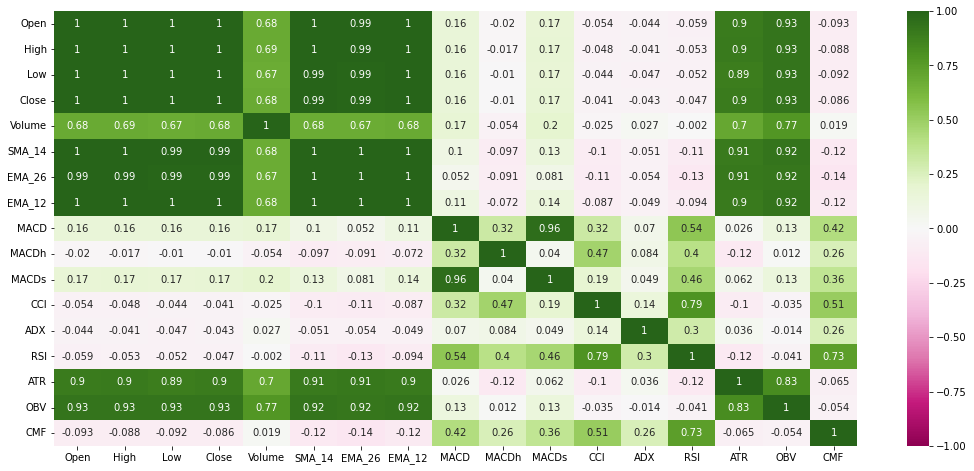

In [35]:
fig = plt.subplots(figsize=(18,8)) 
sns.heatmap(df.corr(), cmap="PiYG", vmin=-1.0, vmax=1.0, annot=True)


Eliminamos las variables que no son relevantes en la explicación de la fluctuación del precio de cierre.

In [36]:
DF = df[['Open','High','Low','Close', 'Volume', 'SMA_14', 'EMA_26','EMA_12', 'MACD','MACDs', 'ATR', 'OBV']]

In [37]:
DF

,Open,High,Low,Close,Volume,SMA_14,EMA_26,EMA_12,MACD,MACDs,ATR,OBV
Date,,,,,,,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,8036550,321.108355,331.283191,320.549943,-10.735773,-11.077486,11.291673,-1.577285e+08
2015-01-02,314.079010,315.838989,313.565002,315.032013,7860650,320.907571,330.079400,319.701031,-10.380708,-10.938131,10.647321,-1.498678e+08
2015-01-03,314.846008,315.149994,281.082001,281.082001,33054400,317.416571,326.449963,313.759642,-12.692487,-11.289002,12.320786,-1.829222e+08
2015-01-04,281.145996,287.230011,257.612000,264.195007,55629100,313.370287,321.838485,306.134313,-15.706176,-12.172437,13.556685,-2.385513e+08
2015-01-05,265.084015,278.341003,265.084015,274.473999,43962800,309.269431,318.330005,301.263496,-17.068365,-13.151622,13.598791,-1.945885e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-23,30140.685547,34370.437500,30097.828125,33086.234375,38363572311,28469.266323,28343.248536,29318.876315,975.627779,522.356433,975.610474,1.121024e+12
2023-10-24,33077.304688,35150.433594,32880.761719,33901.527344,44934999645,28934.302595,28754.972892,30023.899550,1268.926658,671.670478,1068.043431,1.165959e+12
2023-10-25,33916.042969,35133.757812,33709.109375,34502.820312,25254318008,29479.266881,29180.739368,30712.964283,1532.224915,843.781365,1093.515217,1.191213e+12


Guardamos el dataset final en n archivo CSV llamado 'DF_BTC'.

In [38]:
DF.to_csv('DF_BTC.csv', encoding='utf-8')